In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

cm = "YlOrRd"

In [2]:
def add_column(df, name, series):
    df[name] = series
    return df

In [3]:
import os, glob
csv_files = glob.glob(os.path.join("./data", "*.csv"))
df = pd.concat((add_column(pd.read_csv(path, converters={
    "genre": lambda x: x.replace("short story", "short stories")
}), "year_read", int(os.path.splitext(os.path.basename(path))[0])) for path in csv_files), ignore_index=True).rename(columns={"country of origin": "country"})
df["year"] = pd.to_numeric(df["year"])

In [4]:
df

,author,title,year,genre,country,pages,year_read
0,Curtis Yarvin,Moldbug on Carlyle,2009,politics,USA,115,2021
1,Curtis Yarvin,"Technology, Communism and the Brown Scare",2013,politics,USA,39,2021
2,Curtis Yarvin,Patchwork: A Political System for the 21st Cen...,2008,politics,USA,91,2021
3,Ernst Jünger,Der Waldgang,1951,philosophy,Germany,96,2021
4,H. P. Lovecraft,Collected Short Stories,1937,short stories,USA,800,2021
...,...,...,...,...,...,...,...
276,Jorge Luis Borges,Labyrinthe,1949,short stories,Argentina,169,2020
277,Rolf Schilling,Lingaraja,2012,poetry,Germany,317,2020
278,Rita Reiners,Der Dornbusch,1969,poetry,Germany,68,2020
279,Angelus Silesius,Werde wesentlich!,1657,poetry,Germany,15,2020


In [5]:
df.pivot_table(values="pages", index=["year_read", "genre"], aggfunc=np.sum).unstack().fillna(0).astype(int).transpose().style.background_gradient(axis="rows", cmap=cm)

/run/user/1000/ipykernel_2068951/1286576343.py:1: FutureWarning: The provided callable <function sum at 0x7f91703b5d00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values="pages", index=["year_read", "genre"], aggfunc=np.sum).unstack().fillna(0).astype(int).transpose().style.background_gradient(axis="rows", cmap=cm)


In [6]:
df.pivot_table(values="pages", index=["author"], aggfunc=np.sum).sort_values(by="pages", ascending=False).head(10)

/run/user/1000/ipykernel_2068951/1081841235.py:1: FutureWarning: The provided callable <function sum at 0x7f91703b5d00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(values="pages", index=["author"], aggfunc=np.sum).sort_values(by="pages", ascending=False).head(10)


,pages
author,
Rolf Schilling,4076
Friedrich Nietzsche,2168
Rainer Maria Rilke,1938
Ayn Rand,1703
Walther Kranz,1201
Thorwald Dethlefsen,1188
Stefan Zweig,1043
Jörg Fauser,992
A. C. Bhaktivedanta Prabhupada,989


<Axes: xlabel='genre'>

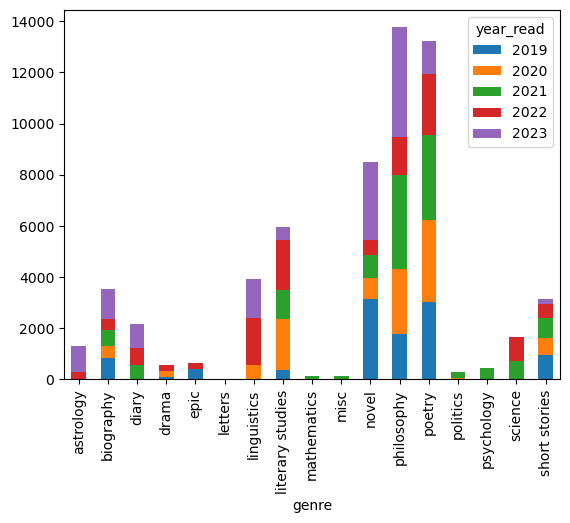

In [7]:
df.groupby(["genre", "year_read"])["pages"].sum().unstack().plot.bar(stacked=True)

<Axes: xlabel='country'>

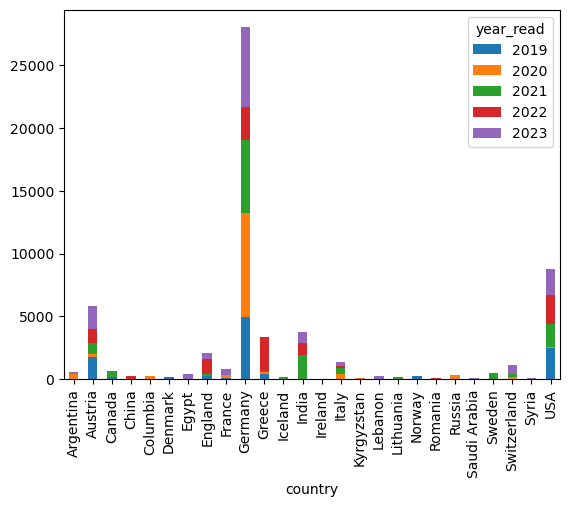

In [8]:
df.groupby(["country", "year_read"])["pages"].sum().unstack().plot.bar(stacked=True)

<Axes: xlabel='country', ylabel='year'>

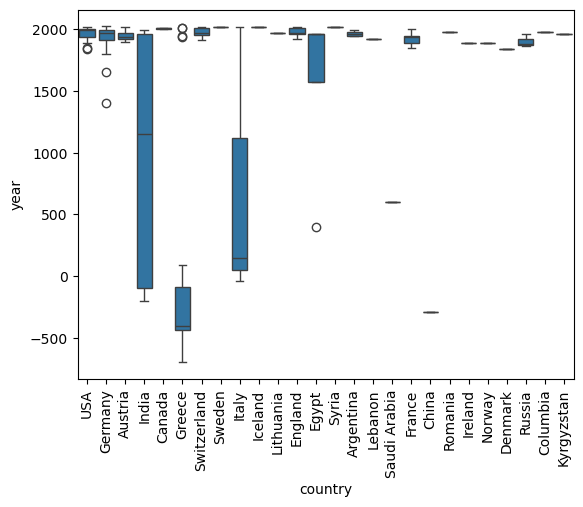

In [9]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x="country", y="year")

<Axes: xlabel='genre', ylabel='year'>

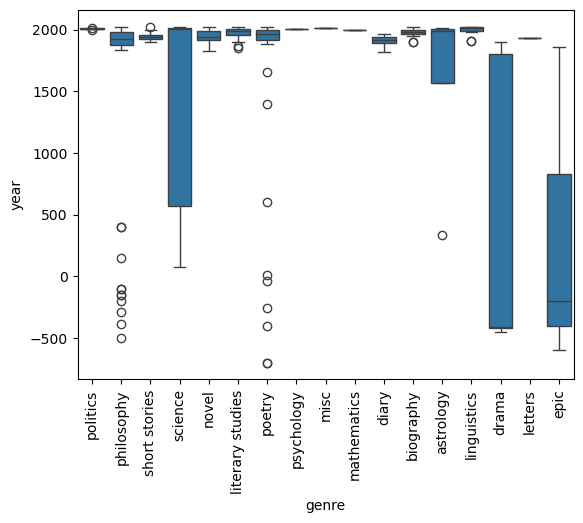

In [10]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x="genre", y="year")

<Axes: xlabel='year_read'>

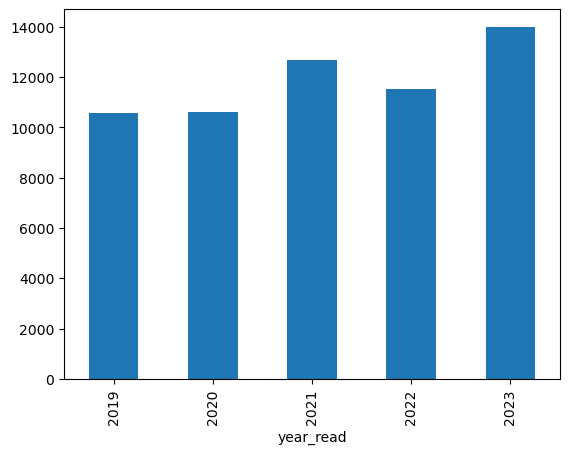

In [11]:
df.groupby("year_read")["pages"].sum().plot.bar(stacked=True)

<Axes: xlabel='year_read', ylabel='pages'>

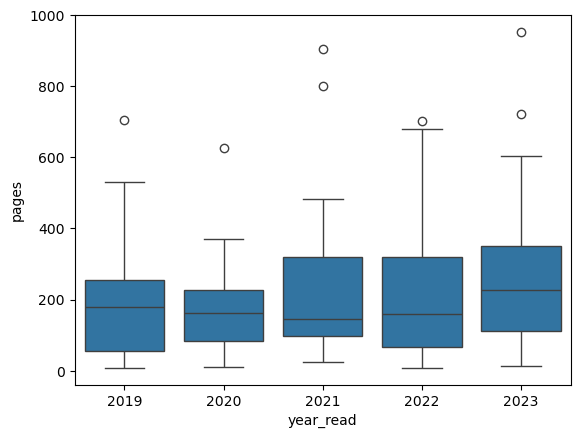

In [12]:
sns.boxplot(data=df, x="year_read", y="pages")

<Axes: xlabel='year_read', ylabel='year'>

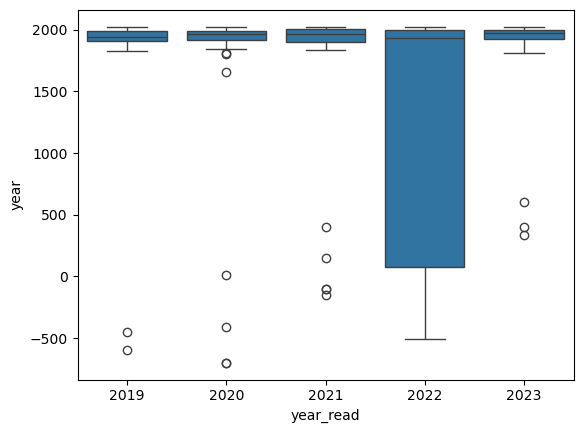

In [13]:
sns.boxplot(data=df, x="year_read", y="year")

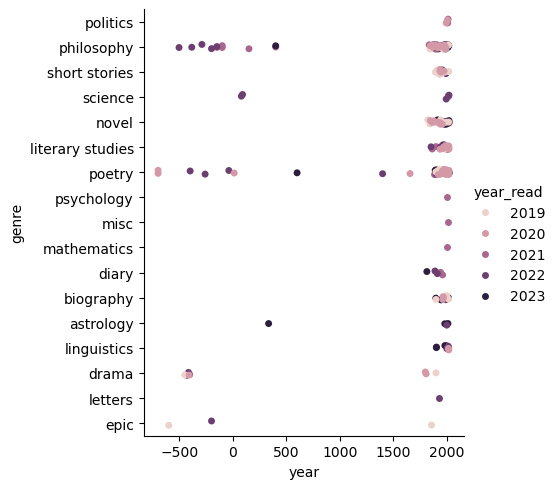

In [14]:
sns.catplot(data=df, x="year", y="genre", hue='year_read')

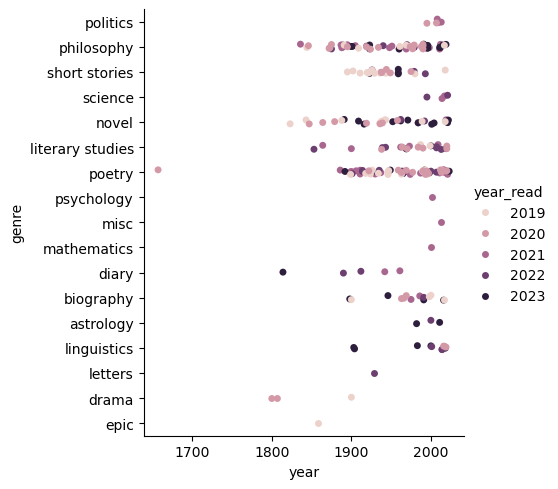

In [15]:
sns.catplot(data=df[df["year"] > 1600], x="year", y="genre", hue='year_read')

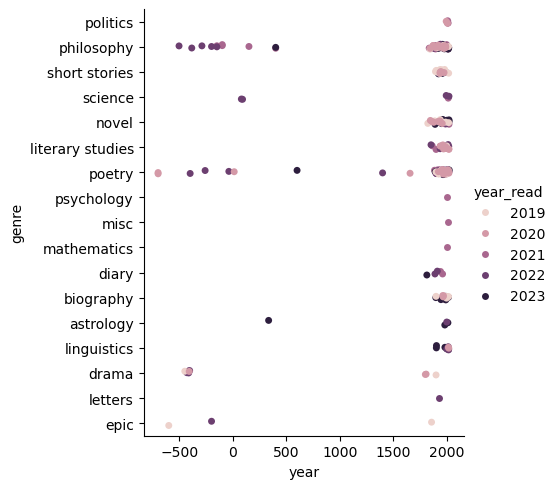

In [16]:
sns.catplot(data=df, x="year", y="genre", hue='year_read')

In [18]:
df[["country", "genre"]].value_counts().head(10)

country  genre           
Germany  poetry              47
         philosophy          36
         literary studies    16
         novel               10
Austria  short stories        9
Germany  biography            8
India    philosophy           7
USA      philosophy           7
Greece   drama                6
USA      novel                6
Name: count, dtype: int64

In [19]:
df.groupby(["country", "genre"])["pages"].sum().sort_values(ascending=False).head(10)

country  genre           
Germany  poetry              7744
         philosophy          7371
         literary studies    3479
         novel               2759
India    philosophy          2293
USA      novel               1980
Germany  diary               1738
         biography           1581
Austria  poetry              1570
USA      philosophy          1452
Name: pages, dtype: int64